## Importing Libraries

In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('spam.csv', encoding='latin-1')

In [3]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
4014,spam,You will be receiving this week's Triple Echo ...,NaN,NaN,NaN
1341,ham,Just chill for another 6hrs. If you could slee...,NaN,NaN,NaN
4915,ham,"Just dropped em off, omw back now",NaN,NaN,NaN
4217,ham,Actually i'm waiting for 2 weeks when they sta...,NaN,NaN,NaN
3466,spam,URGENT! We are trying to contact U. Todays dra...,NaN,NaN,NaN


In [4]:
df.shape


(5572, 5)

## 1. Data Cleaning

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [6]:
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [7]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [8]:
df.rename(columns={'v1':'target','v2':'text'},inplace=True)
df.sample(5)

,target,text
1209,ham,His bday real is in april .
4217,ham,Actually i'm waiting for 2 weeks when they sta...
2526,ham,Do u noe how 2 send files between 2 computers?
2482,ham,Pansy! You've been living in a jungle for two ...
453,ham,Ok i will tell her to stay out. Yeah its been ...


In [9]:
!pip install scikit-learn


[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [10]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [11]:
df['target'] = encoder.fit_transform(df['target'])

In [12]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [13]:
df.isnull().sum()

target    0
text      0
dtype: int64

In [14]:
df.duplicated().sum()

403

In [15]:
df = df.drop_duplicates(keep= "first")

In [16]:
df.duplicated().sum()

0

In [17]:
df.shape

(5169, 2)

## 2. EDA

In [18]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [19]:
!pip install matplotlib


[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [20]:
df['target'].value_counts()

0    4516
1     653
Name: target, dtype: int64

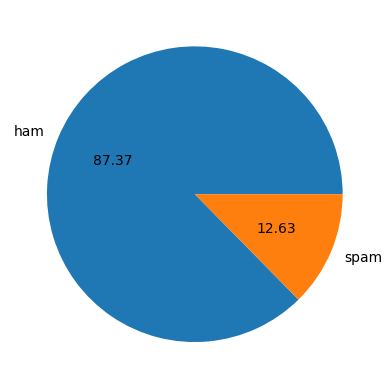

In [21]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(), labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [22]:
import nltk

In [23]:
nltk.download('punkt')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [24]:
df['num_characters'] = df['text'].apply(len)

In [25]:
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [26]:
df['num_sentence'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [27]:
df.head()

,target,text,num_characters,num_words,num_sentence
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [28]:
df[['num_characters','num_words','num_sentence']]. describe()

,num_characters,num_words,num_sentence
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [29]:

df[df['target'] == 1][['num_characters','num_words','num_sentence']].describe()


,num_characters,num_words,num_sentence
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [30]:
df[df['target'] == 0][['num_characters','num_words','num_sentence']].describe()


,num_characters,num_words,num_sentence
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [31]:
!pip install seaborn


[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [32]:
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

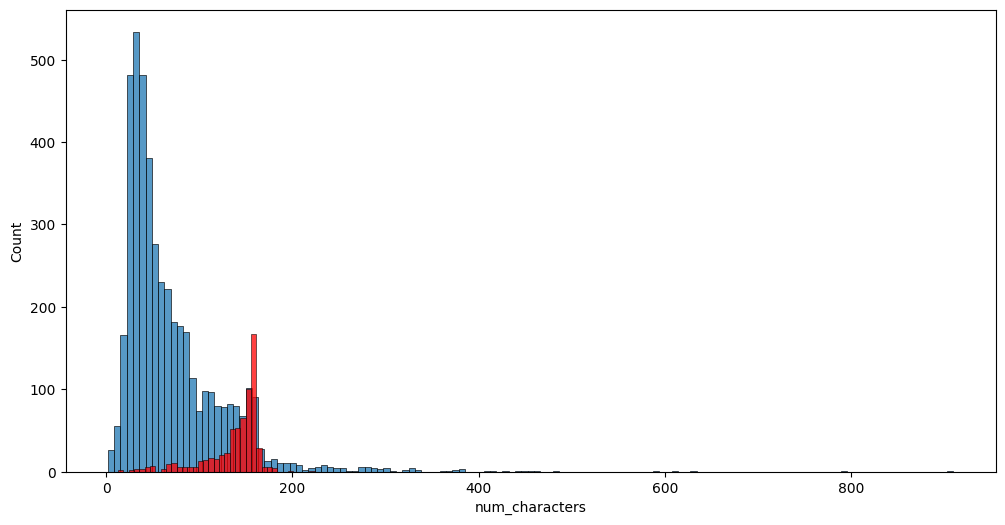

In [33]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_characters'])
sns.histplot(df[df['target'] == 1]['num_characters'],color='red')

C:\Python310\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


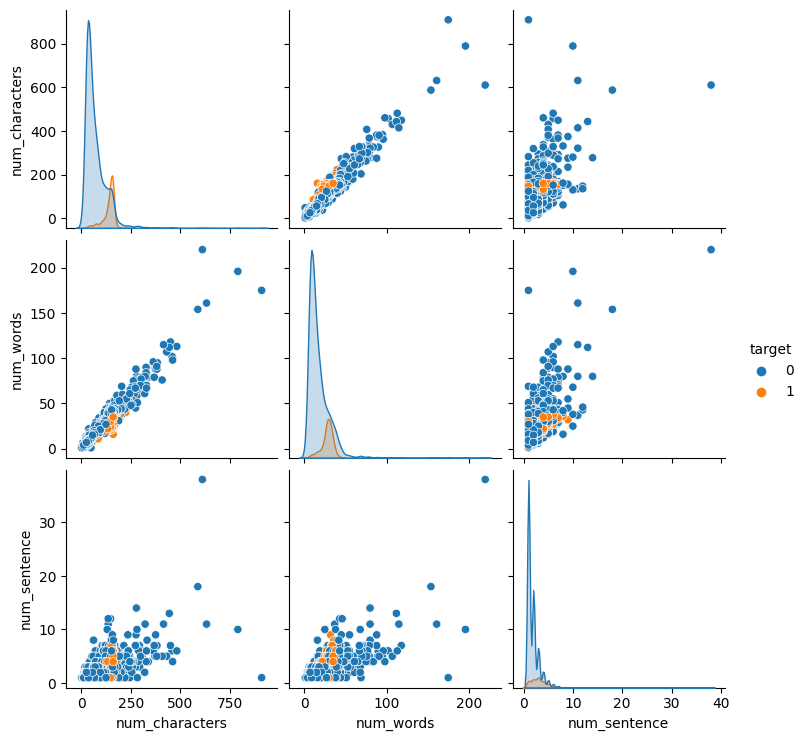

In [34]:
sns.pairplot(df,hue='target')


<Axes: xlabel='num_words', ylabel='Count'>

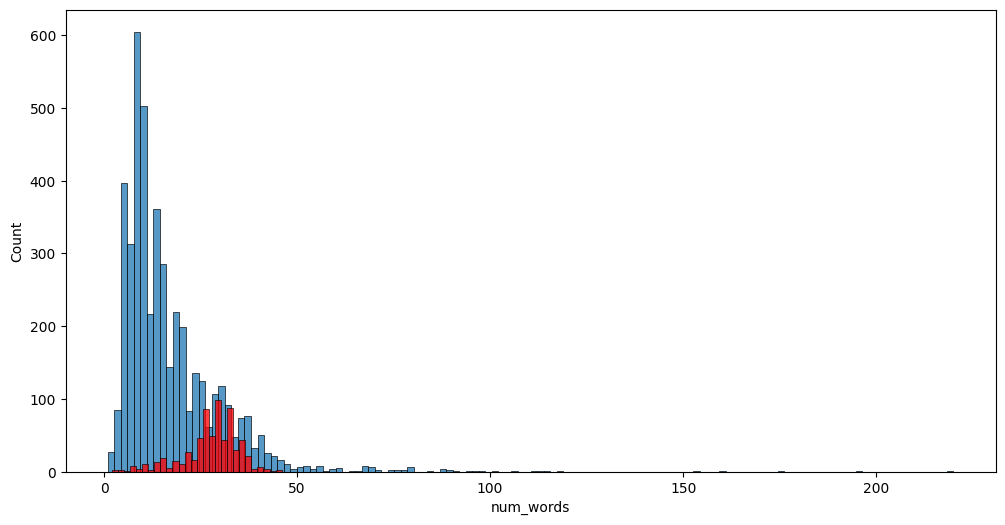

In [35]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_words'])
sns.histplot(df[df['target'] == 1]['num_words'],color='red')

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_12552\3028576344.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot = True)


<Axes: >

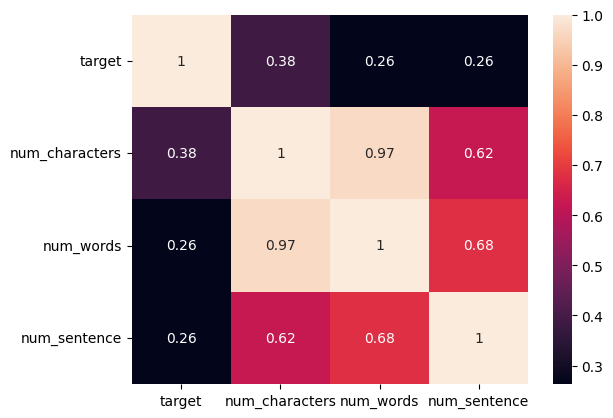

In [36]:
sns.heatmap(df.corr(), annot = True)

## 3. Data Processing


In [37]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('loving')

'love'

In [38]:
import string
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    y = []
    for msg in text:
        if msg.isalnum():
            y.append(msg)
            
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
    
    return " ".join(y)
    

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [39]:
transform_text("I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today")

'gon na home soon want talk stuff anymor tonight k cri enough today'

In [40]:
ans = transform_text("I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today")

In [41]:
df['text'][10]

"I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today."

In [42]:
df.head()

,target,text,num_characters,num_words,num_sentence
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [43]:
df['transformed_text'] = df['text'].apply(transform_text)


In [44]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [45]:
!pip install wordcloud


[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [46]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [47]:
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep=" "))

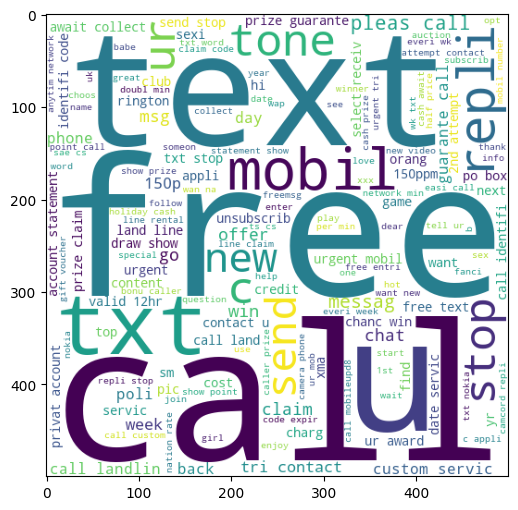

In [48]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [49]:
ham_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep=" "))


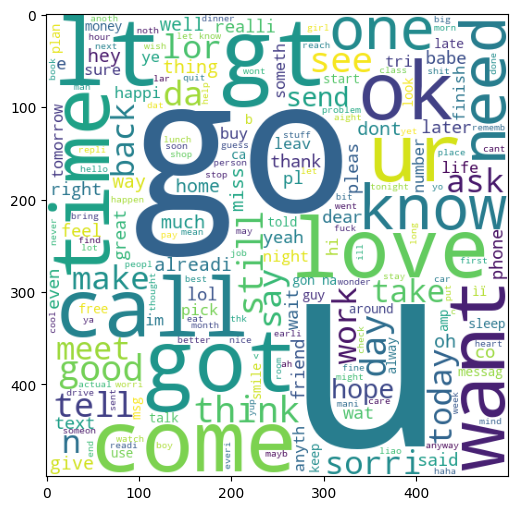

In [50]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [51]:
spam_corpus = []
for msg in df[df['target'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [52]:
len(spam_corpus)


9939

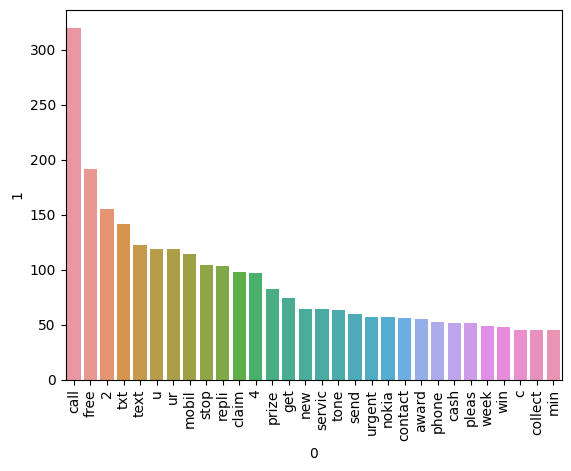

In [53]:
from collections import Counter
sns.barplot(x=0, y=1, data = pd.DataFrame(Counter(spam_corpus).most_common(30)))
plt.xticks(rotation='vertical')
plt.show()

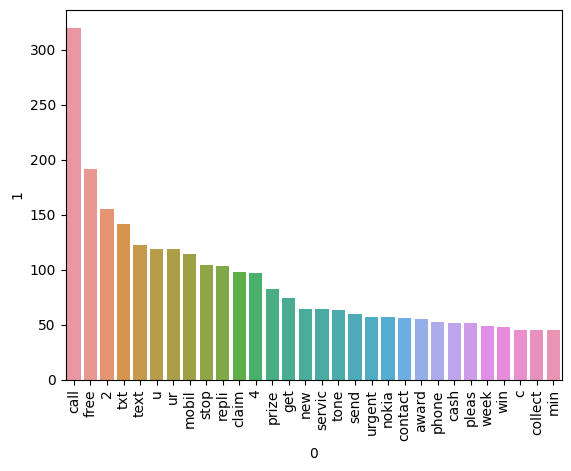

In [54]:
from collections import Counter
import seaborn as sns

spam_counts = Counter(spam_corpus)

top_30_spam = pd.DataFrame(spam_counts.most_common(30))

sns.barplot(x=0, y=1, data=top_30_spam)

plt.xticks(rotation='vertical')

plt.show()

In [55]:
ham_corpus= []
for msg in df[df['target']==0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)    

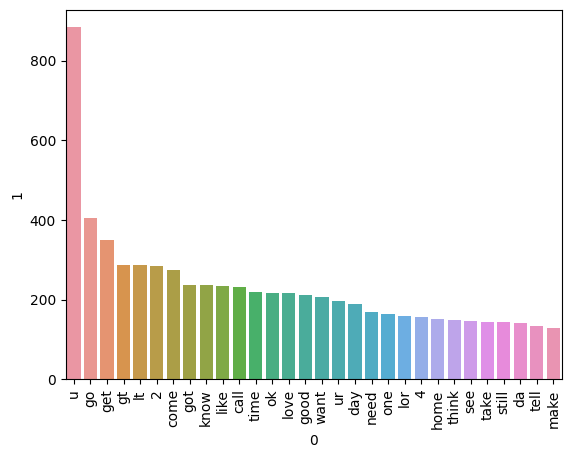

In [56]:
from collections import Counter
import seaborn as sns 
sns.barplot(x=0, y=1, data= pd.DataFrame(Counter(ham_corpus).most_common(30)))
plt.xticks(rotation='vertical')
plt.show()

In [57]:
df.head()

,target,text,num_characters,num_words,num_sentence,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [58]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [59]:
#we are creating array of x and y x being our input and y being the output and these arrays will be used to train and test the 
#model we are working on

In [60]:
#first we try the Count Vectorizer this wil create a array of each word and the frequecy it is used in all sentence alltogether
x = cv.fit_transform(df['transformed_text']).toarray()

In [61]:
x.shape #(no. of sentences, no. of words)

(5169, 6708)

In [62]:
# now we will create an output array corrsponding to target
#list y = list of target value i.e.
y = df['target'].values

In [63]:
import sklearn
from sklearn.model_selection import train_test_split
# now we'll bifurcate the training set with test set
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state = 2)
#0.2 signifies 20%

#Remember we are applying bayes first purely on basis of experience 

In [64]:
#now for traiing this kind of dataset where there are multiple independent input variables and combiantion of them 
#resulting in the our output in a classification situation and also achieveing a high accuracy 
#we implement "NAIVE BAYES"  

In [65]:
#so let's train them with bayes
from sklearn.naive_bayes import MultinomialNB, GaussianNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

In [66]:
#as we do not kow the dta division we'll go with all the subparts 
mnb = MultinomialNB()
gnb = GaussianNB()
bnb = BernoulliNB()

In [67]:
mnb.fit(x_train,y_train)
y_pred1 = mnb.predict(x_test)
print(accuracy_score(y_test, y_pred1))
print(confusion_matrix(y_test, y_pred1))
print(precision_score(y_test, y_pred1))

0.9642166344294004
[[871  25]
 [ 12 126]]
0.8344370860927153


In [68]:
#low accuracy and very low precision

In [69]:
gnb.fit(x_train,y_train)
y_pred2 = gnb.predict(x_test)
print(accuracy_score(y_test, y_pred2))
print(confusion_matrix(y_test, y_pred2))
print(precision_score(y_test, y_pred2))

0.8800773694390716
[[792 104]
 [ 20 118]]
0.5315315315315315


In [70]:
#good accuracy but low precision

In [71]:
bnb.fit(x_train,y_train)
y_pred3 = bnb.predict(x_test)
print(accuracy_score(y_test, y_pred3))
print(confusion_matrix(y_test, y_pred3))
print(precision_score(y_test, y_pred3))

0.9700193423597679
[[893   3]
 [ 28 110]]
0.9734513274336283


In [72]:
#now we'll try improving it using tfidf veectorization and see if there is an impact

In [73]:
x1 = tfidf.fit_transform(df['transformed_text']).toarray()

In [74]:
import sklearn
from sklearn.model_selection import train_test_split
# now we'll bifurcate the training set with test set
x1_train, x1_test, y1_train, y1_test = train_test_split(x1,y,test_size=0.2, random_state = 2)
#0.2 signifies 20%

In [75]:
#so let's train them with bayes
from sklearn.naive_bayes import MultinomialNB, GaussianNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

In [76]:
#as we do not kow the dta division we'll go with all the subparts 
mnb = MultinomialNB()
gnb = GaussianNB()
bnb = BernoulliNB()

In [77]:
mnb.fit(x1_train,y1_train)
y1_pred1 = mnb.predict(x1_test)
print(accuracy_score(y1_test, y1_pred1))
print(confusion_matrix(y1_test, y1_pred1))
print(precision_score(y1_test, y1_pred1))

0.9709864603481625
[[896   0]
 [ 30 108]]
1.0


In [78]:
gnb.fit(x1_train,y1_train)
y1_pred2 = gnb.predict(x1_test)
print(accuracy_score(y1_test, y1_pred2))
print(confusion_matrix(y1_test, y1_pred2))
print(precision_score(y1_test, y1_pred2))

0.8694390715667312
[[788 108]
 [ 27 111]]
0.5068493150684932


In [79]:
bnb.fit(x1_train,y1_train)
y1_pred3 = bnb.predict(x1_test)
print(accuracy_score(y1_test, y1_pred3))
print(confusion_matrix(y1_test, y1_pred3))
print(precision_score(y1_test, y1_pred3))

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


In [80]:
# we can clearly see that the mnb is giving way better accuracy and precision when implementing with tfidf vectorization
#so we can make our model as "TFIDF --> MNB" for now till we find anything better

In [81]:
#now that we are done with this we will go across all possible classification theorems to learn which fits best

In [82]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [83]:
#now we'll make object for each one and run the for loop in which we'll train and store the prediction and accuracy of each model

In [84]:
from sklearn.model_selection import train_test_split

# Assuming you have defined X and y variables

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)


In [85]:
x.shape

(5169, 6708)

In [86]:
y.shape

(5169,)

In [87]:
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)


(4135, 6708) (1034, 6708) (4135,) (1034,)


In [88]:
#making object for each model 
lrc = LogisticRegression(solver = "liblinear", penalty='l1')
svc = SVC(kernel = "sigmoid", gamma = 1.0)
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth = 5)
knc = KNeighborsClassifier()
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbc = GradientBoostingClassifier(n_estimators=50, random_state=2)
xgb = XGBClassifier(n_estimators=50, random_state=2)

In [89]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBC':gbc,
    'xgb':xgb
}


In [90]:
def train_model(clf, x_train, x_test, y_train, y_test):
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    accuracy = accuracy_score(y_pred, y_test)
    precision = precision_score(y_pred, y_test)
    
    return accuracy, precision

In [91]:
print(train_model(svc,x_train,x_test,y_train, y_test))

(0.9264990328820116, 0.6884057971014492)


In [92]:
accuracys = []
precisions = []
for name, clf in clfs.items():
    accuracy, precision = train_model(clf, x_train,x_test, y_train, y_test)
    accuracys.append(accuracy)
    precisions.append(precision)
    print("For ",name)
    print("Accuracy - ",accuracy)
    print("Precision - ",precision)
    

For  SVC
Accuracy -  0.9264990328820116
Precision -  0.6884057971014492
For  KN
Accuracy -  0.9061895551257253
Precision -  0.2971014492753623
For  NB
Accuracy -  0.9642166344294004
Precision -  0.9130434782608695
For  DT
Accuracy -  0.9235976789168279
Precision -  0.47101449275362317
For  LR
Accuracy -  0.9709864603481625
Precision -  0.8043478260869565
For  RF
Accuracy -  0.971953578336557
Precision -  0.7898550724637681
For  AdaBoost
Accuracy -  0.9632495164410058
Precision -  0.7681159420289855
For  BgC
Accuracy -  0.9622823984526112
Precision -  0.7898550724637681
For  ETC
Accuracy -  0.97678916827853
Precision -  0.8333333333333334
For  GBC
Accuracy -  0.9439071566731141
Precision -  0.6159420289855072
For  xgb
Accuracy -  0.9738878143133463
Precision -  0.8333333333333334


In [93]:
performance_comp = pd.DataFrame({'Algorithm': clfs.keys(), 'Accuracy':accuracys, 'Precision':precisions}).sort_values(by='Precision', ascending=False)

In [94]:
performance_comp

,Algorithm,Accuracy,Precision
2,NB,0.964217,0.913043
8,ETC,0.976789,0.833333
10,xgb,0.973888,0.833333
4,LR,0.970986,0.804348
5,RF,0.971954,0.789855
7,BgC,0.962282,0.789855
6,AdaBoost,0.963250,0.768116
0,SVC,0.926499,0.688406
9,GBC,0.943907,0.615942
3,DT,0.923598,0.471014


In [95]:
#none of the performances are giving results even close to our chosen now we'll check with tfidf#
#	Algorithm	Accuracy	Precision
#    10	xgb	0.970019	0.833333
#    0	SVC	0.972921	0.818841
#    7	BgC	0.958414	0.818841
#    8	ETC	0.972921	0.811594
#    5	RF	0.971954	0.789855
#    6	AdaBoost	0.961315	0.753623
#    9	GBC	0.952611	0.702899
#    2	NB	0.959381	0.695652
#    4	LR	0.951644	0.681159
#    3	DT	0.937137	0.637681
#    1	KN	0.900387	0.253623
#    This is data with cv vectorization

In [96]:
accuracy_sc = []
precision_sc = []
for name, clf in clfs.items():
    accuracy, precision = train_model(clf, x1_train,x1_test, y1_train, y1_test)
    accuracy_sc.append(accuracy)
    precision_sc.append(precision)
    print("For ",name)
    print("Accuracy - ",accuracy)
    print("Precision - ",precision)

For  SVC
Accuracy -  0.9758220502901354
Precision -  0.8405797101449275
For  KN
Accuracy -  0.9052224371373307
Precision -  0.2898550724637681
For  NB
Accuracy -  0.9709864603481625
Precision -  0.782608695652174
For  DT
Accuracy -  0.9303675048355899
Precision -  0.6159420289855072
For  LR
Accuracy -  0.9584139264990329
Precision -  0.7101449275362319
For  RF
Accuracy -  0.9758220502901354
Precision -  0.8333333333333334
For  AdaBoost
Accuracy -  0.960348162475822
Precision -  0.7608695652173914
For  BgC
Accuracy -  0.9584139264990329
Precision -  0.8115942028985508
For  ETC
Accuracy -  0.9748549323017408
Precision -  0.8333333333333334
For  GBC
Accuracy -  0.9468085106382979
Precision -  0.6594202898550725
For  xgb
Accuracy -  0.9671179883945842
Precision -  0.8115942028985508


In [97]:
performance_df = pd.DataFrame({'Algorithm': clfs.keys(), 'Accuracy':accuracys, 'Precision':precisions}).sort_values(by='Precision', ascending=False)

In [98]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")


In [99]:
performance_df1


,Algorithm,variable,value
0,NB,Accuracy,0.964217
1,ETC,Accuracy,0.976789
2,xgb,Accuracy,0.973888
3,LR,Accuracy,0.970986
4,RF,Accuracy,0.971954
5,BgC,Accuracy,0.962282
6,AdaBoost,Accuracy,0.963250
7,SVC,Accuracy,0.926499
8,GBC,Accuracy,0.943907
9,DT,Accuracy,0.923598


C:\Python310\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


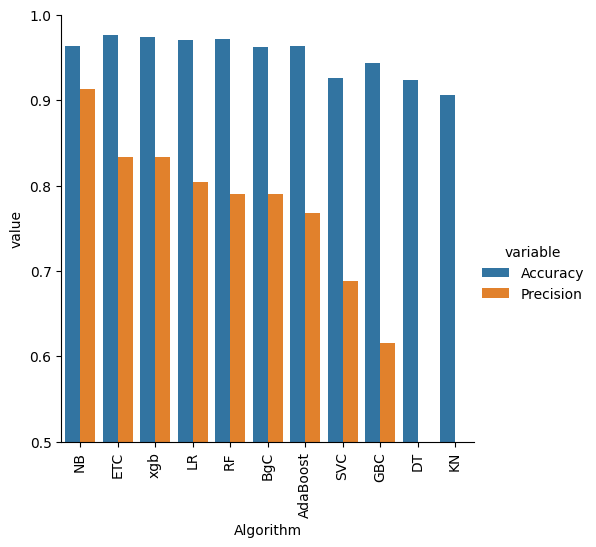

In [100]:
sns.catplot(x = 'Algorithm', y='value', 
               hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [101]:
#model improve
# 1. Change the max_features parameter of TfIdf

In [102]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_sc,'Precision_max_ft_3000':precision_sc}).sort_values('Precision_max_ft_3000',ascending=False)


In [103]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_scaling':accuracy_sc,'Precision_scaling':precision_sc}).sort_values('Precision_scaling',ascending=False)


In [104]:
new_df = performance_df.merge(temp_df,on='Algorithm')


In [105]:
new_df_scaled = new_df.merge(temp_df,on='Algorithm')

In [106]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_num_chars':accuracy_sc,'Precision_num_chars':precision_sc}).sort_values('Precision_num_chars',ascending=False)

In [107]:
new_df_scaled.merge(temp_df,on='Algorithm')

,Algorithm,Accuracy,Precision,Accuracy_scaling_x,Precision_scaling_x,Accuracy_scaling_y,Precision_scaling_y,Accuracy_num_chars,Precision_num_chars
0,NB,0.964217,0.913043,0.970986,0.782609,0.970986,0.782609,0.970986,0.782609
1,ETC,0.976789,0.833333,0.974855,0.833333,0.974855,0.833333,0.974855,0.833333
2,xgb,0.973888,0.833333,0.967118,0.811594,0.967118,0.811594,0.967118,0.811594
3,LR,0.970986,0.804348,0.958414,0.710145,0.958414,0.710145,0.958414,0.710145
4,RF,0.971954,0.789855,0.975822,0.833333,0.975822,0.833333,0.975822,0.833333
5,BgC,0.962282,0.789855,0.958414,0.811594,0.958414,0.811594,0.958414,0.811594
6,AdaBoost,0.963250,0.768116,0.960348,0.760870,0.960348,0.760870,0.960348,0.760870
7,SVC,0.926499,0.688406,0.975822,0.840580,0.975822,0.840580,0.975822,0.840580
8,GBC,0.943907,0.615942,0.946809,0.659420,0.946809,0.659420,0.946809,0.659420
9,DT,0.923598,0.471014,0.930368,0.615942,0.930368,0.615942,0.930368,0.615942


In [108]:
# Voting Classifier
svc = SVC(kernel='sigmoid', gamma=1.0,probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

from sklearn.ensemble import VotingClassifier


In [109]:
voting = VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ('et', etc)],voting='soft')

In [110]:
voting.fit(x1_train,y1_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [111]:
y_pred = voting.predict(x1_test)
print("Accuracy",accuracy_score(y1_test,y_pred))
print("Precision",precision_score(y1_test,y_pred))

Accuracy 0.9816247582205029
Precision 0.9917355371900827


In [112]:
# Applying stacking
estimators=[('svm', svc), ('nb', mnb), ('et', etc)]
final_estimator=RandomForestClassifier()

In [113]:
from sklearn.ensemble import StackingClassifier

In [114]:
clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)

In [115]:
clf.fit(x1_train,y1_train)
y_pred = clf.predict(x1_test)
print("Accuracy",accuracy_score(y1_test,y_pred))
print("Precision",precision_score(y1_test,y_pred))

Accuracy 0.9796905222437138
Precision 0.9465648854961832


In [118]:
mnb.fit(x1_train,y1_train)
y1_pred1 = mnb.predict(x1_test)
print(accuracy_score(y1_test, y1_pred1))
print(confusion_matrix(y1_test, y1_pred1))
print(precision_score(y1_test, y1_pred1))


0.9709864603481625
[[896   0]
 [ 30 108]]
1.0


In [120]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))